# Mini Project 1


## first part


In [2]:
#import
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np

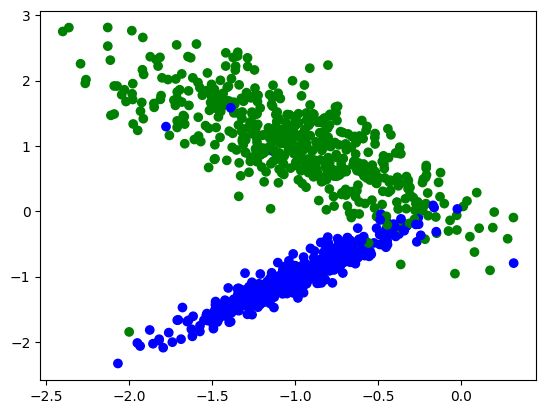

In [3]:
#generate dataset for classification
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                     n_clusters_per_class=1, class_sep=1, random_state=53)
x1, x2 = X[:,0], X[:,1]

color = colors = ['b' if label == 0 else 'g' for label in y]
plt.scatter(x1, x2, c=color)
plt.show()

In [4]:
#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)
print("#train = ", y_train.size)
print("#test = ", y_test.size)
print("persentage of instaneces with label 1 in train set = ", np.sum(y_train == 1)/ y_train.size*100)
print("persentage of instaneces with label 1 in test set = ", np.sum(y_test == 1)/ y_test.size*100)

#train =  800
#test =  200
persentage of instaneces with label 1 in train set =  49.75
persentage of instaneces with label 1 in test set =  50.0


train mean: 0.48604662962578904
test mean: 0.48338428165813113
train var: 0.0393256232487668
test var: 0.04748180779252437



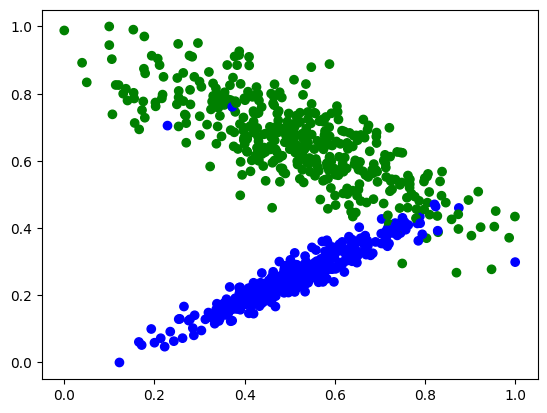

In [5]:
#normalaiz
scaler = MinMaxScaler()
X_normalized_train = scaler.fit_transform(X_train)
X_normalized_test = scaler.fit_transform(X_test)

x1, x2 = X_normalized_train[:,0], X_normalized_train[:,1]
color = colors = ['b' if label == 0 else 'g' for label in y_train]
plt.scatter(x1, x2, c=color)

print(f"train mean: {X_normalized_train.mean()}")
print(f"test mean: {X_normalized_test.mean()}")
print(f"train var: {X_normalized_train.var()}")
print(f"test var: {X_normalized_test.var()}\n")

In [6]:
#method 1 of classification - logistic regression
model1 = linear_model.LogisticRegression(solver='sag', max_iter= 100, random_state=53)
model1.fit(X_train, y_train)
train1_acc = model1.score(X_train, y_train)
test1_acc = model1.score(X_test, y_test)
print(f"accuracy on train set :{train1_acc*100:.2f}%")
print(f"accuracy on test set : {test1_acc*100:.2f}%")

accuracy on train set :97.38%
accuracy on test set : 96.50%


In [7]:
#method 1 of classification - logistic regression + normalization
model1_n = linear_model.LogisticRegression(solver='sag', max_iter= 100, random_state=53)
model1_n.fit(X_normalized_train, y_train)
train1_acc = model1_n.score(X_normalized_train, y_train)
test1_acc = model1_n.score(X_normalized_test, y_test)
print(f"accuracy on train set :{train1_acc*100:.2f}%")
print(f"accuracy on test set : {test1_acc*100:.2f}%")

accuracy on train set :97.50%
accuracy on test set : 96.00%


In [8]:
#2ed method for classification - perceptron
model2 = linear_model.Perceptron(max_iter=100 , random_state=53)
model2.fit(X_train, y_train)
train2_acc = model2.score(X_train, y_train)
test2_acc = model2.score(X_test, y_test)
print(f"accuracy on train set :{train2_acc*100:.2f}%")
print(f"accuracy on test set : {test2_acc*100:.2f}%")

accuracy on train set :96.75%
accuracy on test set : 95.50%


In [9]:
#3rd method - sgd classifire
model3 = linear_model.SGDClassifier(loss='log_loss', max_iter=100, random_state=53)
model3.fit(X_train, y_train)
train3_acc = model3.score(X_train, y_train)
test3_acc = model3.score(X_test, y_test)
print(f"accuracy on train set :{train3_acc*100:.2f}%")
print(f"accuracy on test set : {test3_acc*100:.2f}%")

accuracy on train set :97.25%
accuracy on test set : 97.00%


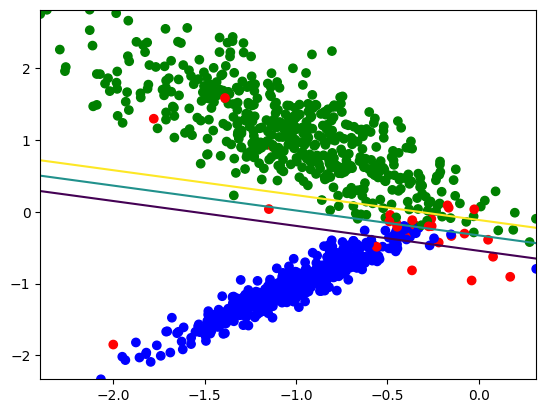

In [12]:
#desision boundry
x1_min, x2_min = X.min(0)
x1_max, x2_max = X.max(0)
x1_min, x2_min
x1, x2 = X[:,0], X[:,1]

n = 200
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m , x2m = np.meshgrid(x1r,x2r)

xm = np.stack((x1m.flatten() , x2m.flatten()), axis=1)
ym = model1.decision_function(xm)

y_hat = model1.predict(X)
color = ['b' if (label == 0 and pred == 0) else
         ('g' if (label == 1 and pred == 1) else 'r') for label, pred in zip(y, y_hat)]
plt.scatter(x1, x2, c=color)
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[-1, 0, 1])
plt.show()


#train =  800
#test =  200
persentage of instaneces with label 1 in train set =  49.75
persentage of instaneces with label 1 in test set =  50.0

logistic regression
accuracy on train set :66.75%
accuracy on test set : 62.00%

perceptron
accuracy on train set :65.88%
accuracy on test set : 60.50%

SGDClassifier
accuracy on train set :58.63%
accuracy on test set : 58.50%



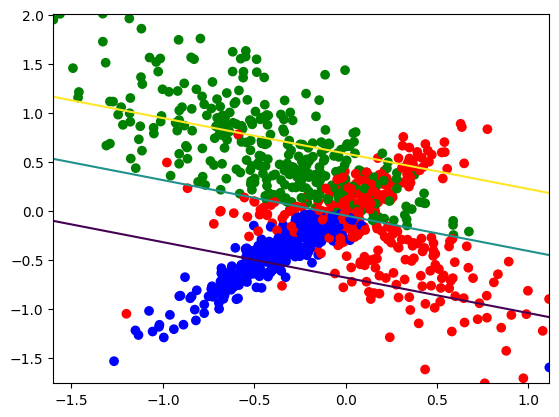

In [14]:
#decreasing class_sep value
#generate dataset for classification
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                     n_clusters_per_class=1, class_sep=0.2, random_state=53)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)
print("#train = ", y_train.size)
print("#test = ", y_test.size)
print("persentage of instaneces with label 1 in train set = ", np.sum(y_train == 1)/ y_train.size*100)
print("persentage of instaneces with label 1 in test set = ", np.sum(y_test == 1)/ y_test.size*100)

max_iter = 500
#method 1 of classification - logistic regression
model1 = linear_model.LogisticRegression(solver='sag', max_iter= max_iter, random_state=53)
model1.fit(X_train, y_train)
train1_acc = model1.score(X_train, y_train)
test1_acc = model1.score(X_test, y_test)
print("\n\033[1mlogistic regression\033[0m")
print(f"accuracy on train set :{train1_acc*100:.2f}%")
print(f"accuracy on test set : {test1_acc*100:.2f}%")

#2ed method for classification - perceptron
model2 = linear_model.Perceptron(max_iter=max_iter , random_state=53)
model2.fit(X_train, y_train)
train2_acc = model2.score(X_train, y_train)
test2_acc = model2.score(X_test, y_test)
print("\n\033[1mperceptron\033[0m")
print(f"accuracy on train set :{train2_acc*100:.2f}%")
print(f"accuracy on test set : {test2_acc*100:.2f}%")

#3rd method - sgd classifire
model3 = linear_model.SGDClassifier(loss='log_loss', max_iter=max_iter, random_state=53)
model3.fit(X_train, y_train)
train3_acc = model3.score(X_train, y_train)
test3_acc = model3.score(X_test, y_test)
print("\n\033[1mSGDClassifier\033[0m")
print(f"accuracy on train set :{train3_acc*100:.2f}%")
print(f"accuracy on test set : {test3_acc*100:.2f}%\n")

#desision boundry
x1, x2 = X[:,0], X[:,1]
x1_min, x2_min = X.min(0)
x1_max, x2_max = X.max(0)
x1_min, x2_min

n = 200
x1r = np.linspace(x1_min, x1_max, n)
x2r = np.linspace(x2_min, x2_max, n)
x1m , x2m = np.meshgrid(x1r,x2r)

xm = np.stack((x1m.flatten() , x2m.flatten()), axis=1)
ym = model1.decision_function(xm)

y_hat = model1.predict(X)
color = ['b' if (label == 0 and pred == 0) else
         ('g' if (label == 1 and pred == 1) else 'r') for label, pred in zip(y, y_hat)]
plt.scatter(x1, x2, c=color)
plt.contour(x1m, x2m, ym.reshape(x1m.shape), levels=[-1, 0, 1])
plt.show()

#train =  800
#test =  200
persentage of instaneces with label 0 in train set =  33.625
persentage of instaneces with label 0 in train set =  33.625
persentage of instaneces with label 1 in train set =  33.375
persentage of instaneces with label 1 in test set =  33.5
persentage of instaneces with label 2 in test set =  33.0
persentage of instaneces with label 2 in test set =  33.0

logistic regression
accuracy on train set :98.00%
accuracy on test set : 97.50%

perceptron
accuracy on train set :94.62%
accuracy on test set : 95.50%

SGDClassifier
accuracy on train set :96.50%
accuracy on test set : 97.50%



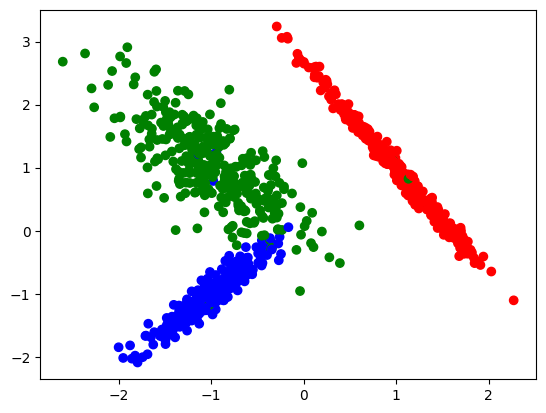

In [16]:
# 3 classes
#decreasing class_sep value
#generate dataset for classification
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_redundant=0,
                                     n_classes=3, n_clusters_per_class=1, class_sep=1, random_state=53)

x1, x2 = X[:,0], X[:,1]
colors = ['b' if label == 0 else 'g' if label == 1 else 'r' for label in y]
plt.scatter(x1, x2, c=colors)

#split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)
print("#train = ", y_train.size)
print("#test = ", y_test.size)
print("persentage of instaneces with label 0 in train set = ", np.sum(y_train == 0)/ y_train.size*100)
print("persentage of instaneces with label 0 in train set = ", np.sum(y_train == 0)/ y_train.size*100)
print("persentage of instaneces with label 1 in train set = ", np.sum(y_train == 1)/ y_train.size*100)
print("persentage of instaneces with label 1 in test set = ", np.sum(y_test == 1)/ y_test.size*100)
print("persentage of instaneces with label 2 in test set = ", np.sum(y_test == 2)/ y_test.size*100)
print("persentage of instaneces with label 2 in test set = ", np.sum(y_test == 2)/ y_test.size*100)

max_iter = 500
#method 1 of classification - logistic regression
model1 = linear_model.LogisticRegression(solver='sag', max_iter= max_iter, random_state=53)
model1.fit(X_train, y_train)
train1_acc = model1.score(X_train, y_train)
test1_acc = model1.score(X_test, y_test)
print("\n\033[1mlogistic regression\033[0m")
print(f"accuracy on train set :{train1_acc*100:.2f}%")
print(f"accuracy on test set : {test1_acc*100:.2f}%")

#2ed method for classification - perceptron
model2 = linear_model.Perceptron(max_iter=max_iter , random_state=53)
model2.fit(X_train, y_train)
train2_acc = model2.score(X_train, y_train)
test2_acc = model2.score(X_test, y_test)
print("\n\033[1mperceptron\033[0m")
print(f"accuracy on train set :{train2_acc*100:.2f}%")
print(f"accuracy on test set : {test2_acc*100:.2f}%")

#3rd method - sgd classifire
model3 = linear_model.SGDClassifier(loss='log_loss', max_iter=max_iter, random_state=53)
model3.fit(X_train, y_train)
train3_acc = model3.score(X_train, y_train)
test3_acc = model3.score(X_test, y_test)
print("\n\033[1mSGDClassifier\033[0m")
print(f"accuracy on train set :{train3_acc*100:.2f}%")
print(f"accuracy on test set : {test3_acc*100:.2f}%\n")


## 2nd part

In [ ]:
#import libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import random
from sklearn.preprocessing import MinMaxScaler

Variable Information</br>
       1. variance of Wavelet Transformed image (continuous)</br>
       2. skewness of Wavelet Transformed image (continuous)</br>
       3. curtosis of Wavelet Transformed image (continuous)</br>
       4. entropy of image (continuous)</br>
       5. class (integer)

In [ ]:
#import data
if not os.path.exists("Mp1_1/banknote"):
    os.makedirs("Mp1_1/banknote")

!gdown 14zJXpntLb9gLW9Uu_Z1jfSIltmAujtsX
!mv '/content/banknote+authentication.zip' '/content/Mp1_1/banknote'
!unzip /content/Mp1_1/banknote/banknote+authentication.zip -d /content/Mp1_1/banknote

banknote = pd.read_csv("/content/Mp1_1/banknote/data_banknote_authentication.txt", names=['variance','skewness','curtosis','entropy','class'])
banknote.head()

Downloading...
From: https://drive.google.com/uc?id=14zJXpntLb9gLW9Uu_Z1jfSIltmAujtsX
To: /content/banknote+authentication.zip
100% 46.6k/46.6k [00:00<00:00, 102MB/s]
Archive:  /content/Mp1_1/banknote/banknote+authentication.zip
 extracting: /content/Mp1_1/banknote/data_banknote_authentication.txt  


,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


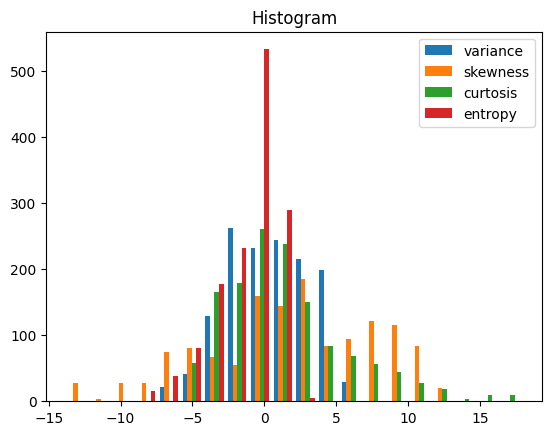

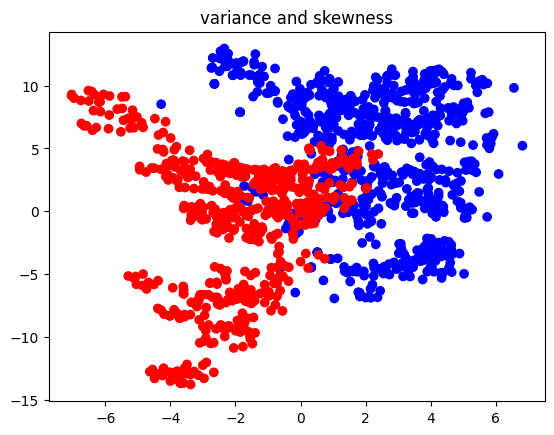

In [ ]:
X, y = banknote[['variance','skewness','curtosis','entropy']], banknote['class']

#histogram
plt.hist(X, label = X.columns, bins= 20)
plt.title('Histogram')
plt.legend()
plt.show()

X, y = X.values, y.values
x1, x2, x3, x4 = X[:,0], X[:,1], X[:,2], X[:,3]
colors = ['b' if label == 0 else 'r' for label in y]
plt.scatter(x1, x2, c=colors)
plt.title('variance and skewness')
plt.show()

In [ ]:
#split data into train and test
print("#data in class 1 with lable 0 = ", np.sum(y == 0))
print("#data in class 2 with lable 1 = ", np.sum(y == 1))
X = np.hstack((np.ones((len(X),1)),X)) #add bias
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=y, random_state=53)
print("#train = ", y_train.size)
print("#test = ", y_test.size)
print("persentage of instaneces with label 1 in train set = ", np.sum(y_train == 1)/ y_train.size*100)
print("persentage of instaneces with label 1 in test set = ", np.sum(y_test == 1)/ y_test.size*100)

#data in class 1 with lable 0 =  762
#data in class 2 with lable 1 =  610
#train =  1097
#test =  275
persentage of instaneces with label 1 in train set =  44.48495897903373
persentage of instaneces with label 1 in test set =  44.36363636363637


In [ ]:
#functions
def sigmoid(x):
  return 1/(1+np.exp(-x))
def logistic_reg(x, w):
  y_hat = sigmoid(x @ w)
  return y_hat
def bce_loss(y, y_hat):
  loss = -((y*np.log(y_hat)) + ((1-y)*np.log(1-y_hat)))
  mean_loss = np.mean(loss)
  return loss, mean_loss
def gradient(X, y, y_hat):
  y.resize(y_hat.shape)
  grads = (np.dot(X.T, (y_hat-y)))/len(y_hat)
  return grads
def gradient_decent(W, grads, alpha=0.5):
  W = W - (alpha*grads)
  return W
def accuracy(y, y_hat):
  y.resize(y_hat.shape)
  acc = np.sum(y == np.round(y_hat))/len(y_hat)
  return acc

In [ ]:
#test functions
np.random.seed(53)
x, w = np.random.randn(4,5),np.random.randn(5,1)
y = np.array([1, 0, 1, 0])
#logistic regresion tets
print("logistic regresion tets")
y_hat = logistic_reg(x,w)
print("X = \n",x,"\n W = \n",w,"\n result \n",y_hat)
#loss test
y.resize(y_hat.shape)
print(y.shape)
print("Binary cross entropy loss: \n", bce_loss(y, y_hat))
#gradiant
grads = gradient(x, y, y_hat)
print("gradians:\n", grads)
#gradient decent
w = gradient_decent(w, grads, alpha = 0.5)
print("updated wight matrix:\n",w)

y_hat = logistic_reg(x,w)
_, loss = bce_loss(y, y_hat)
print("Binary cross entropy loss: ", loss)
#accuracy
print("accuracy: ", accuracy(y, y_hat))

logistic regresion tets
X = 
 [[ 0.20586487  1.16676171 -2.07263978 -0.63268717  0.99712645]
 [ 2.3945538  -0.54123367  0.75270542 -2.15035179 -0.30544054]
 [-0.40189599 -0.61203264 -0.1234088  -0.5281204   0.91115053]
 [-2.06188871  1.73409247 -1.05618065  1.80602421  1.83942548]] 
 W = 
 [[ 2.39807932]
 [ 0.54290247]
 [-0.22763787]
 [-0.27240552]
 [ 1.09887076]] 
 result 
 [[0.9461903 ]
 [0.99603895]
 [0.46932348]
 [0.09679249]]
(4, 1)
Binary cross entropy loss: 
 (array([[0.05531157],
       [5.53124553],
       [0.75646302],
       [0.10180295]]), 1.611205766243486)
gradians:
 [[ 0.59692319]
 [-0.02730861]
 [ 0.20612796]
 [-0.41317969]
 [-0.16584234]]
updated wight matrix:
 [[ 2.09961773]
 [ 0.55655677]
 [-0.33070185]
 [-0.06581568]
 [ 1.18179193]]
Binary cross entropy loss:  1.338716436183513
accuracy:  0.5


In [ ]:
def fit(x, y, w, n_epochs=1000, alpha = 0.01 , x_test = None, y_test = None):
  err_hist = []
  err_hist_test = []
  acc, acc_t = [],[]
  for epoch in range(n_epochs):
    #shuffle
    # np.random.seed(53)
    #perdice
    y_hat = logistic_reg(x, w)
    if x_test is not None:
      y_hat_t = logistic_reg(x_test, w)
      _, e = bce_loss(y_test,y_hat_t)
      err_hist_test.append(e)
      acc_t.append(accuracy(y_test, y_hat_t))
    #calc loss and acc
    _, err = bce_loss(y,y_hat)
    err_hist.append(err)
    acc.append(accuracy(y, y_hat))

    #gradient calc
    grads = gradient(x, y, y_hat)
    #update
    w = gradient_decent(w, grads, alpha=alpha )
    if(epoch+1)%(n_epochs/10) == 0:
      print(f"Epoch = {epoch + 1}, \t loss = {err}" )

  fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
  axs[0].plot(err_hist, label='train', color='blue')
  axs[0].plot(err_hist_test, label='test', color='r')
  axs[0].set_title('Loss')
  axs[0].legend()

  axs[1].plot(acc, label='Train', color='blue')
  axs[1].plot(acc_t, label='Test', color='red')
  axs[1].set_title('Accuracy')
  axs[1].legend()

  plt.show()
  return w


In [ ]:
#hparams initialization
np.random.seed(53)
w_main = np.random.randn(X_train.shape[1], 1)
w = w_main
alpha = 0.01
n_epochs = 2000

Epoch = 200, 	 loss = 0.3254241638034685
Epoch = 400, 	 loss = 0.10387731753446476
Epoch = 600, 	 loss = 0.08951549623845569
Epoch = 800, 	 loss = 0.08258669936319177
Epoch = 1000, 	 loss = 0.07753113234167701
Epoch = 1200, 	 loss = 0.07343651720949626
Epoch = 1400, 	 loss = 0.06998655788053645
Epoch = 1600, 	 loss = 0.06701546489516702
Epoch = 1800, 	 loss = 0.0644180749895619
Epoch = 2000, 	 loss = 0.06212135159799653


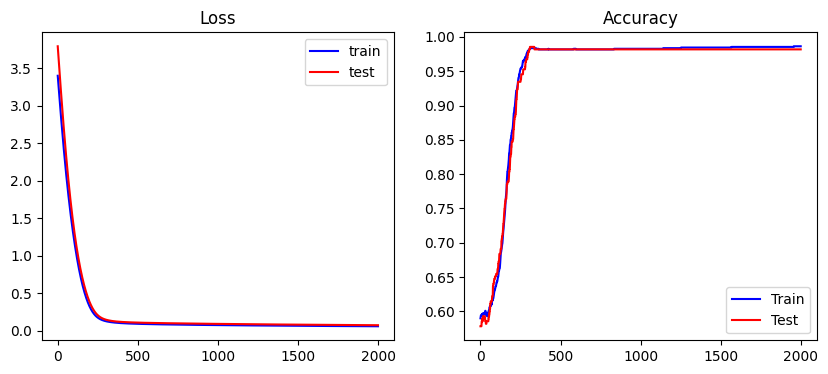

In [ ]:
w = fit(X_train, y_train, w,  n_epochs = n_epochs, x_test =X_test, y_test = y_test)

In [ ]:
#finall accuracy
y_hat = logistic_reg(X_test, w)
acc = accuracy(y_test, y_hat)
print("acc = ", acc)

acc =  0.9818181818181818


In [ ]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# # transform data
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.fit_transform(X_test)
# X_train = np.delete(X_train, 0, axis=1)
# X_test = np.delete(X_test, 0, axis=1)
# #add bias
# X_test = np.hstack((np.ones((len(X_test),1)),X_test))
# X_train = np.hstack((np.ones((len(X_train),1)),X_train))



In [ ]:
#normaliz train
x_min=[None, None, None, None]
x_max=[None, None, None, None]
x_min[0], x_min[1], x_min[2], x_min[3] = X_train[:,1].min(), X_train[:,2].min(), X_train[:,3].min(), X_train[:,4].min()
x_max[0], x_max[1], x_max[2], x_max[3] = X_train[:,1].max(), X_train[:,2].max(), X_train[:,3].max(), X_train[:,4].max()
print(x_min[0], x_min[1], x_min[2], x_min[3])
print(x_max[0], x_max[1], x_max[2], x_max[3])

for i in range(4):
  X_train[:,i+1] = (X_train[:,i+1] - x_min[i] )/(x_max[i] - x_min[i])
  print(X_train[:,i+1])


-7.0364 -13.7731 -5.2861 -8.5482
6.8248 12.9516 17.9274 2.4495
[0.81712262 0.6470219  0.48251955 ... 0.7999596  0.26809367 0.60224223]
[0.85892452 0.74146389 0.50089019 ... 0.50917503 0.51436274 0.68548197]
[0.02926745 0.23892519 0.2071075  ... 0.24726689 0.35530618 0.3265169 ]
[0.38388936 0.59059622 0.83421715 ... 0.82387045 0.73639215 0.79776772]


In [ ]:
#normaliz test
x_min=[None, None, None, None]
x_max=[None, None, None, None]
x_min[0], x_min[1], x_min[2], x_min[3] = X_test[:,1].min(), X_test[:,2].min(), X_test[:,3].min(), X_test[:,4].min()
x_max[0], x_max[1], x_max[2], x_max[3] = X_test[:,1].max(), X_test[:,2].max(), X_test[:,3].max(), X_test[:,4].max()
print(x_min[0], x_min[1], x_min[2], x_min[3])
print(x_max[0], x_max[1], x_max[2], x_max[3])

for i in range(4):
  if x_max[i] - x_min[i] !=0 :
    X_test[:,i+1] = (X_test[:,i+1] - x_min[i] )/(x_max[i] - x_min[i])



-7.0421 -12.9723 -5.2613 -7.8719
6.0919 12.6247 12.9817 2.1353


In [ ]:
##hparams initialization
w = w_main
alpha = 2
n_epochs = 2000

Epoch = 200, 	 loss = 0.254812951751268
Epoch = 400, 	 loss = 0.1824407892266831
Epoch = 600, 	 loss = 0.1463915122171684
Epoch = 800, 	 loss = 0.12454044798715144
Epoch = 1000, 	 loss = 0.10984490806091494
Epoch = 1200, 	 loss = 0.09927048019146763
Epoch = 1400, 	 loss = 0.09128624875594543
Epoch = 1600, 	 loss = 0.08503530559001565
Epoch = 1800, 	 loss = 0.08000076300900792
Epoch = 2000, 	 loss = 0.07585255828901089


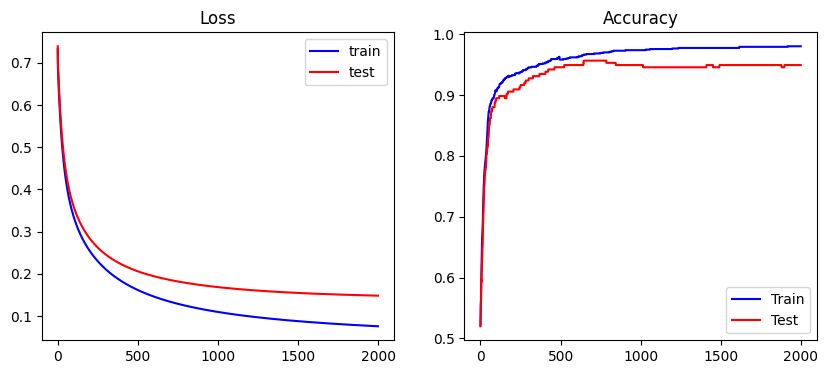

In [ ]:
w = fit(X_train, y_train, w,  n_epochs = n_epochs, alpha =alpha, x_test =X_test, y_test = y_test)


In [ ]:
#finall accuracy
y_hat = logistic_reg(X_test, w)
acc = accuracy(y_test, y_hat)
print("acc = ", acc)

acc =  0.9490909090909091


In [ ]:
np.random.seed(53)
random_row = np.random.choice(X_test.shape[0], size=5, replace=False)
test2 = X_test[random_row]
label_test2 = y_test[random_row]
y_hat2 = logistic_reg(test2, w)
y_hat2 = np.round(y_hat2)
label_test2 , y_hat2 = arrays_with_names = np.vstack(("prediction", label_test2)), np.vstack(("label", y_hat2))
array = np.hstack((label_test2 , y_hat2))
print(array)

[['prediction' 'label']
 ['0' '0.0']
 ['1' '1.0']
 ['1' '0.0']
 ['1' '1.0']
 ['0' '0.0']]


In [ ]:
def gradient(X, y, y_hat):
  y.resize(y_hat.shape)
  y_yhat = (y_hat-y)
  y_yhat[y == 1] *= 762/610
  grads = (np.dot(X.T, (y_yhat)))/len(y_hat)
  return grads

Epoch = 200, 	 loss = 0.24265431927506723
Epoch = 400, 	 loss = 0.1718208966588972
Epoch = 600, 	 loss = 0.13736098135348154
Epoch = 800, 	 loss = 0.11680517740511144
Epoch = 1000, 	 loss = 0.10312312880497664
Epoch = 1200, 	 loss = 0.0933447895158419
Epoch = 1400, 	 loss = 0.08599466587073121
Epoch = 1600, 	 loss = 0.08025688670644604
Epoch = 1800, 	 loss = 0.07564408527744247
Epoch = 2000, 	 loss = 0.07184745972552381


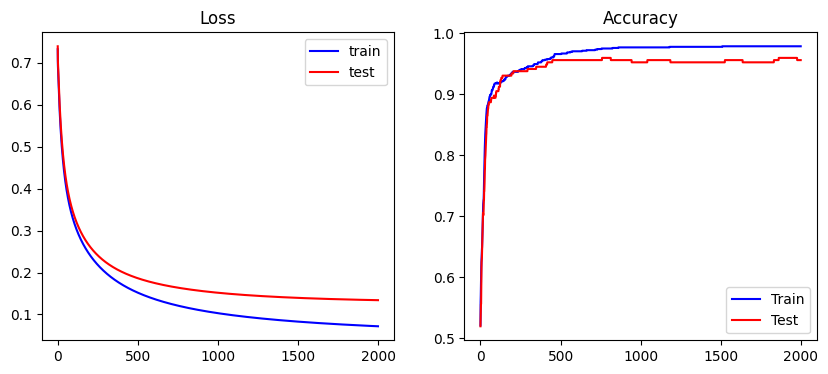

In [ ]:
##hparams initialization
w = w_main
alpha = 2
n_epochs = 2000

w = fit(X_train, y_train, w,  n_epochs = n_epochs, alpha =alpha, x_test =X_test, y_test = y_test)


In [ ]:
#finall accuracy
y_hat = logistic_reg(X_test, w)
acc = accuracy(y_test, y_hat)
print("acc = ", acc)

acc =  0.9563636363636364


In [ ]:
class_weights = {0: 1, 1: 762/610}
model1_2 = linear_model.LogisticRegression(solver='sag', max_iter= 2000, class_weight=class_weights, random_state=53)
model1_2.fit(X_train, y_train)
train1_acc = model1_2.score(X_train, y_train)
test1_acc = model1_2.score(X_test, y_test)
print("\n\033[1mlogistic regression\033[0m")
print(f"accuracy on train set :{train1_acc*100:.2f}%")
print(f"accuracy on test set : {test1_acc*100:.2f}%")


logistic regression
accuracy on train set :97.45%
accuracy on test set : 97.45%


## 3rd part

In [ ]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import log_loss
import warnings
import os
from sklearn import metrics

In [ ]:
#import data
if not os.path.exists("Mp1_1/Heart_Disease_Indicators"):
    os.makedirs("Mp1_1/Heart_Disease_Indicators")

!gdown 1iRnBF4Qsm5ob4nhecfpxMGxXFE9ZnoNr
!mv '/content/Heart_Disease_Indicators.zip' '/content/Mp1_1/Heart_Disease_Indicators'
!unzip /content/Mp1_1/Heart_Disease_Indicators/Heart_Disease_Indicators.zip -d /content/Mp1_1/Heart_Disease_Indicators

Heart_Disease = pd.read_csv("/content/Mp1_1/Heart_Disease_Indicators/heart_disease_health_indicators.csv")
Heart_Disease.head()

Downloading...
From: https://drive.google.com/uc?id=1iRnBF4Qsm5ob4nhecfpxMGxXFE9ZnoNr
To: /content/Heart_Disease_Indicators.zip
100% 2.14M/2.14M [00:00<00:00, 203MB/s]
Archive:  /content/Mp1_1/Heart_Disease_Indicators/Heart_Disease_Indicators.zip
  inflating: /content/Mp1_1/Heart_Disease_Indicators/heart_disease_health_indicators.csv  


,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0,1,1,1,40,1,0,0,0,0,...,1,0,5,18,15,1,0,9,4,3
1,0,0,0,0,25,1,0,0,1,0,...,0,1,3,0,0,0,0,7,6,1
2,0,1,1,1,28,0,0,0,0,1,...,1,1,5,30,30,1,0,9,4,8
3,0,1,0,1,27,0,0,0,1,1,...,1,0,2,0,0,0,0,11,3,6
4,0,1,1,1,24,0,0,0,1,1,...,1,0,2,3,0,0,0,11,5,4


In [ ]:
label_0_samples = Heart_Disease[Heart_Disease['HeartDiseaseorAttack'] == 0].sample(n=100, random_state=53)
label_1_samples = Heart_Disease[Heart_Disease['HeartDiseaseorAttack'] == 1].sample(n=100, random_state=53)
Heart_Disease2 = pd.concat([label_0_samples, label_1_samples], ignore_index=True)
Heart_Disease2 = Heart_Disease2.sample(frac=1, random_state=53).reset_index(drop=True)

Heart_Disease2.head(10)

,HeartDiseaseorAttack,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,Diabetes,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,1,1,0,1,39,1,0,0,1,1,...,1,0,4,0,15,1,0,10,5,3
1,1,1,0,1,28,0,1,0,0,0,...,1,0,4,0,0,1,0,12,3,5
2,1,0,1,1,34,0,0,0,1,1,...,1,0,3,3,3,0,0,4,5,6
3,1,1,1,1,29,1,0,0,1,1,...,1,0,2,0,0,0,1,8,4,8
4,1,1,1,1,31,1,0,0,0,1,...,1,0,3,0,0,1,1,12,3,7
5,0,0,0,1,22,0,0,0,1,0,...,1,0,3,0,0,0,0,7,5,7
6,1,0,1,0,22,1,0,0,0,0,...,1,0,4,2,7,1,0,9,4,5
7,1,0,0,1,26,0,0,0,0,1,...,1,0,2,0,20,0,1,13,4,6
8,0,0,0,1,29,0,0,0,1,1,...,1,0,2,2,0,0,0,5,6,8
9,1,1,0,1,29,1,0,0,1,0,...,1,0,4,6,0,0,0,11,4,2


In [ ]:
#split data into train and test
X, y = Heart_Disease2.drop(columns =['HeartDiseaseorAttack'], axis = 1), Heart_Disease2['HeartDiseaseorAttack']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=53)
print("#train = ", y_train.size)
print("#test = ", y_test.size)
print("persentage of instaneces with label 1 in train set = ", np.sum(y_train == 1)/ y_train.size*100)
print("persentage of instaneces with label 1 in test set = ", np.sum(y_test == 1)/ y_test.size*100)


#train =  160
#test =  40
persentage of instaneces with label 1 in train set =  50.0
persentage of instaneces with label 1 in test set =  50.0


In [ ]:
max_iter = 1000
#method 1 of classification - logistic regression
model1 = linear_model.LogisticRegression(solver='sag', max_iter= max_iter, random_state=53)
model1.fit(X_train, y_train)
train1_acc = model1.score(X_train, y_train)
test1_acc = model1.score(X_test, y_test)
print("\n\033[1mlogistic regression\033[0m")
print(f"accuracy on train set :{train1_acc*100:.2f}%")
print(f"accuracy on test set : {test1_acc*100:.2f}%")

#2ed method for classification - perceptron
model2 = linear_model.Perceptron(max_iter=max_iter , random_state=53)
model2.fit(X_train, y_train)
train2_acc = model2.score(X_train, y_train)
test2_acc = model2.score(X_test, y_test)
print("\n\033[1mperceptron\033[0m")
print(f"accuracy on train set :{train2_acc*100:.2f}%")
print(f"accuracy on test set : {test2_acc*100:.2f}%")

#3rd method - sgd classifire
model3 = linear_model.SGDClassifier(loss='log_loss', max_iter=max_iter, random_state=53)
model3.fit(X_train, y_train)
train3_acc = model3.score(X_train, y_train)
test3_acc = model3.score(X_test, y_test)
print("\n\033[1mSGDClassifier\033[0m")
print(f"accuracy on train set :{train3_acc*100:.2f}%")
print(f"accuracy on test set : {test3_acc*100:.2f}%\n")


logistic regression
accuracy on train set :81.25%
accuracy on test set : 80.00%

perceptron
accuracy on train set :76.88%
accuracy on test set : 70.00%

SGDClassifier
accuracy on train set :61.88%
accuracy on test set : 67.50%



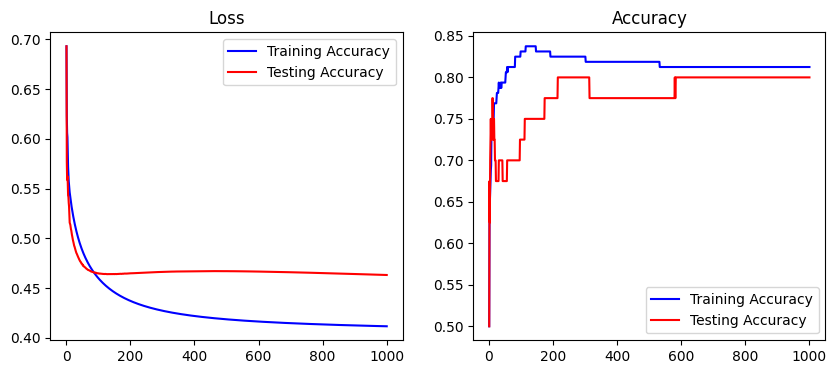

In [ ]:
warnings.filterwarnings("ignore", category=UserWarning)
max_iter = 1000
train_accs, test_accs = [], []
train_losses, test_losses = [], []

for epoch in range(max_iter):
    model1 = linear_model.LogisticRegression(solver='sag', max_iter=epoch, random_state=53, warm_start=True)
    model1.fit(X_train, y_train)

    # Calculate and store accuracy
    train_acc = model1.score(X_train, y_train)
    train_accs.append(train_acc)
    test_acc = model1.score(X_test, y_test)
    test_accs.append(test_acc)

   # Calculate and store loss
    train_loss = log_loss(y_train, model1.predict_proba(X_train)[:, 1])
    train_losses.append(train_loss)
    test_loss = log_loss(y_test, model1.predict_proba(X_test)[:, 1])
    test_losses.append(test_loss)

fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
axs[0].plot(range(1, max_iter + 1), train_losses, label='Training Accuracy', color = "blue")
axs[0].plot(range(1, max_iter + 1), test_losses, label='Testing Accuracy', color = "red")
axs[0].set_title('Loss')
axs[0].legend()

axs[1].plot(range(1, max_iter + 1), train_accs, label='Training Accuracy', color = "blue")
axs[1].plot(range(1, max_iter + 1), test_accs, label='Testing Accuracy', color = "red")
axs[1].set_title('Accuracy')
axs[1].legend()

plt.show()


In [ ]:
#logistic regression + recal and precision
model1 = linear_model.LogisticRegression(solver='sag', max_iter= 1000, random_state=53)
model1.fit(X_train, y_train)
y_hat = model1.predict(X_train)
y_hat_test = model1.predict(X_test)
train1_acc = model1.score(X_train, y_train)
test1_acc = model1.score(X_test, y_test)
precision_train = metrics.precision_score(y_train, y_hat)
precision = metrics.precision_score(y_test, y_hat_test)
recall_train = metrics.recall_score(y_train, y_hat)
recall = metrics.recall_score(y_test, y_hat_test)
print("\n\033[1mlogistic regression\033[0m")
print("\n\033[1m\tTrain set:\033[0m")
print(f"\taccuracy:{train1_acc*100:.2f}%")
print(f"\tprecision:{precision_train*100:.2f}%")
print(f"\trecall:{recall_train*100:.2f}%")
print("\n\033[1m\tTest set:\033[0m")
print(f"\taccuracy : {test1_acc*100:.2f}%")
print(f"\tprecision : {precision*100:.2f}%")
print(f"\trecall : {recall*100:.2f}%")

#perceptron + recal and precision
model2 = linear_model.Perceptron(max_iter=max_iter , random_state=53)
model2.fit(X_train, y_train)
y_hat = model2.predict(X_train)
y_hat_test = model2.predict(X_test)
train2_acc = model2.score(X_train, y_train)
test2_acc = model2.score(X_test, y_test)
precision_train2 = metrics.precision_score(y_train, y_hat)
precision2 = metrics.precision_score(y_test, y_hat_test)
recall_train2 = metrics.recall_score(y_train, y_hat)
recall2 = metrics.recall_score(y_test, y_hat_test)
print("\n\033[1mprecision\033[0m")
print("\n\033[1m\tTrain set:\033[0m")
print(f"\taccuracy:{train2_acc*100:.2f}%")
print(f"\tprecision:{precision_train2*100:.2f}%")
print(f"\trecall:{recall_train2*100:.2f}%")
print("\n\033[1m\tTest set:\033[0m")
print(f"\taccuracy : {test2_acc*100:.2f}%")
print(f"\tprecision : {precision2*100:.2f}%")
print(f"\trecall : {recall2*100:.2f}%")


logistic regression

	Train set:
	accuracy:81.25%
	precision:80.49%
	recall:82.50%

	Test set:
	accuracy : 80.00%
	precision : 80.00%
	recall : 80.00%

precision

	Train set:
	accuracy:76.88%
	precision:75.29%
	recall:80.00%

	Test set:
	accuracy : 70.00%
	precision : 66.67%
	recall : 80.00%
